In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Let's check how many classes we have in our target column|

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
# checking how many data we have in each class

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
# checking the basic statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
# let's check duplicated records in our data
df.duplicated().sum()

240

In [9]:
# Let's drop the duplicates
df = df.drop_duplicates()

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.duplicated().sum()

0

In [12]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
'''# Let's do standard scaling for our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
'''
# for decision tree scaling is not required

"# Let's do standard scaling for our data\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n"

In [14]:
X = df.drop('quality',axis=1)
y = df['quality']

In [15]:
# train test split the data
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
941,9.9,0.27,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5
525,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9
1015,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4
1487,6.0,0.64,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.6
992,6.5,0.40,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1285,11.3,0.37,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5
1329,7.4,0.60,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6
1011,8.9,0.32,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4


In [17]:
y_train

941     7
525     5
1015    6
1487    5
992     6
       ..
1285    5
1329    6
1526    6
1011    6
1322    5
Name: quality, Length: 910, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([4, 6, 6, 6, 4, 7, 4, 5, 7, 6, 7, 7, 5, 5, 6, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 7, 4, 5, 4, 5,
       6, 5, 5, 5, 4, 6, 6, 7, 5, 5, 7, 5, 6, 3, 6, 5, 5, 7, 5, 5, 6, 6,
       5, 6, 5, 7, 5, 8, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 7, 5, 5,
       6, 7, 6, 5, 5, 6, 6, 6, 4, 7, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 7,
       7, 5, 5, 5, 5, 6, 4, 5, 5, 6, 5, 5, 5, 6, 4, 5, 4, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 7, 6, 6, 6, 3, 5, 7, 6, 6, 6, 6, 5, 6, 6, 4, 6, 5, 4,
       6, 7, 4, 5, 7, 7, 8, 5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 7, 6, 7, 7,
       5, 6, 5, 7, 5, 5, 4, 5, 5, 6, 3, 5, 4, 6, 5, 5, 6, 5, 6, 4, 6, 5,
       7, 7, 5, 5, 5, 7, 5, 7, 5, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 6,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 7, 6, 5, 5, 5, 5, 5,
       6, 6, 7, 4, 5, 7, 5, 6, 6, 6, 7, 6, 6, 8, 5, 5, 6, 6, 7, 5, 5, 6,
       6, 6, 5, 7, 6, 6, 6, 5, 7, 5, 5, 5, 6, 7, 4, 6, 5, 7, 5, 7, 6, 6,
       5, 5, 7, 7, 5, 6, 4, 6, 6, 5, 5, 7, 3, 5, 6,

In [21]:
# Let's check the accuracy
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_pred)

0.47216035634743875

In [23]:
# let's check our model score
model.score(X_train,y_train)

1.0

In [24]:
# clearly it's overfitted

In [25]:
# let's do some hyperparameter tuning

In [26]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [29]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'splitter': 'random'}

In [30]:
# now let's train our model based on these hyperparameters

In [31]:
model_with_best_params = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=6,
    min_samples_split=7,
    splitter='random'
)

In [32]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=7,
                       splitter='random')

In [33]:
model_with_best_params_pred = model_with_best_params.predict(X_test)
model_with_best_params_pred

array([5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5,

In [34]:
accuracy_score(y_test,model_with_best_params_pred)

0.5256124721603563

In [35]:
# clearly the accuracy has improved

[Text(0.4851190476190476, 0.9166666666666666, 'x[2] <= 0.217\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.26785714285714285, 0.75, 'x[6] <= 70.775\ngini = 0.619\nsamples = 379\nvalue = [3, 24, 177, 149, 25, 1]'),
 Text(0.17857142857142858, 0.5833333333333334, 'x[7] <= 0.995\ngini = 0.622\nsamples = 328\nvalue = [3, 23, 143, 139, 20, 0]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[6] <= 28.411\ngini = 0.624\nsamples = 91\nvalue = [2, 7, 21, 50, 11, 0]'),
 Text(0.047619047619047616, 0.25, 'x[9] <= 0.613\ngini = 0.694\nsamples = 49\nvalue = [1, 4, 14, 21, 9, 0]'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.676\nsamples = 32\nvalue = [1, 3, 13, 12, 3, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.588\nsamples = 17\nvalue = [0, 1, 1, 9, 6, 0]'),
 Text(0.14285714285714285, 0.25, 'x[2] <= 0.177\ngini = 0.488\nsamples = 42\nvalue = [1, 3, 7, 29, 2, 0]'),
 Text(0.11904761904761904, 0.08333333333333333, 'gini = 0.455\nsampl

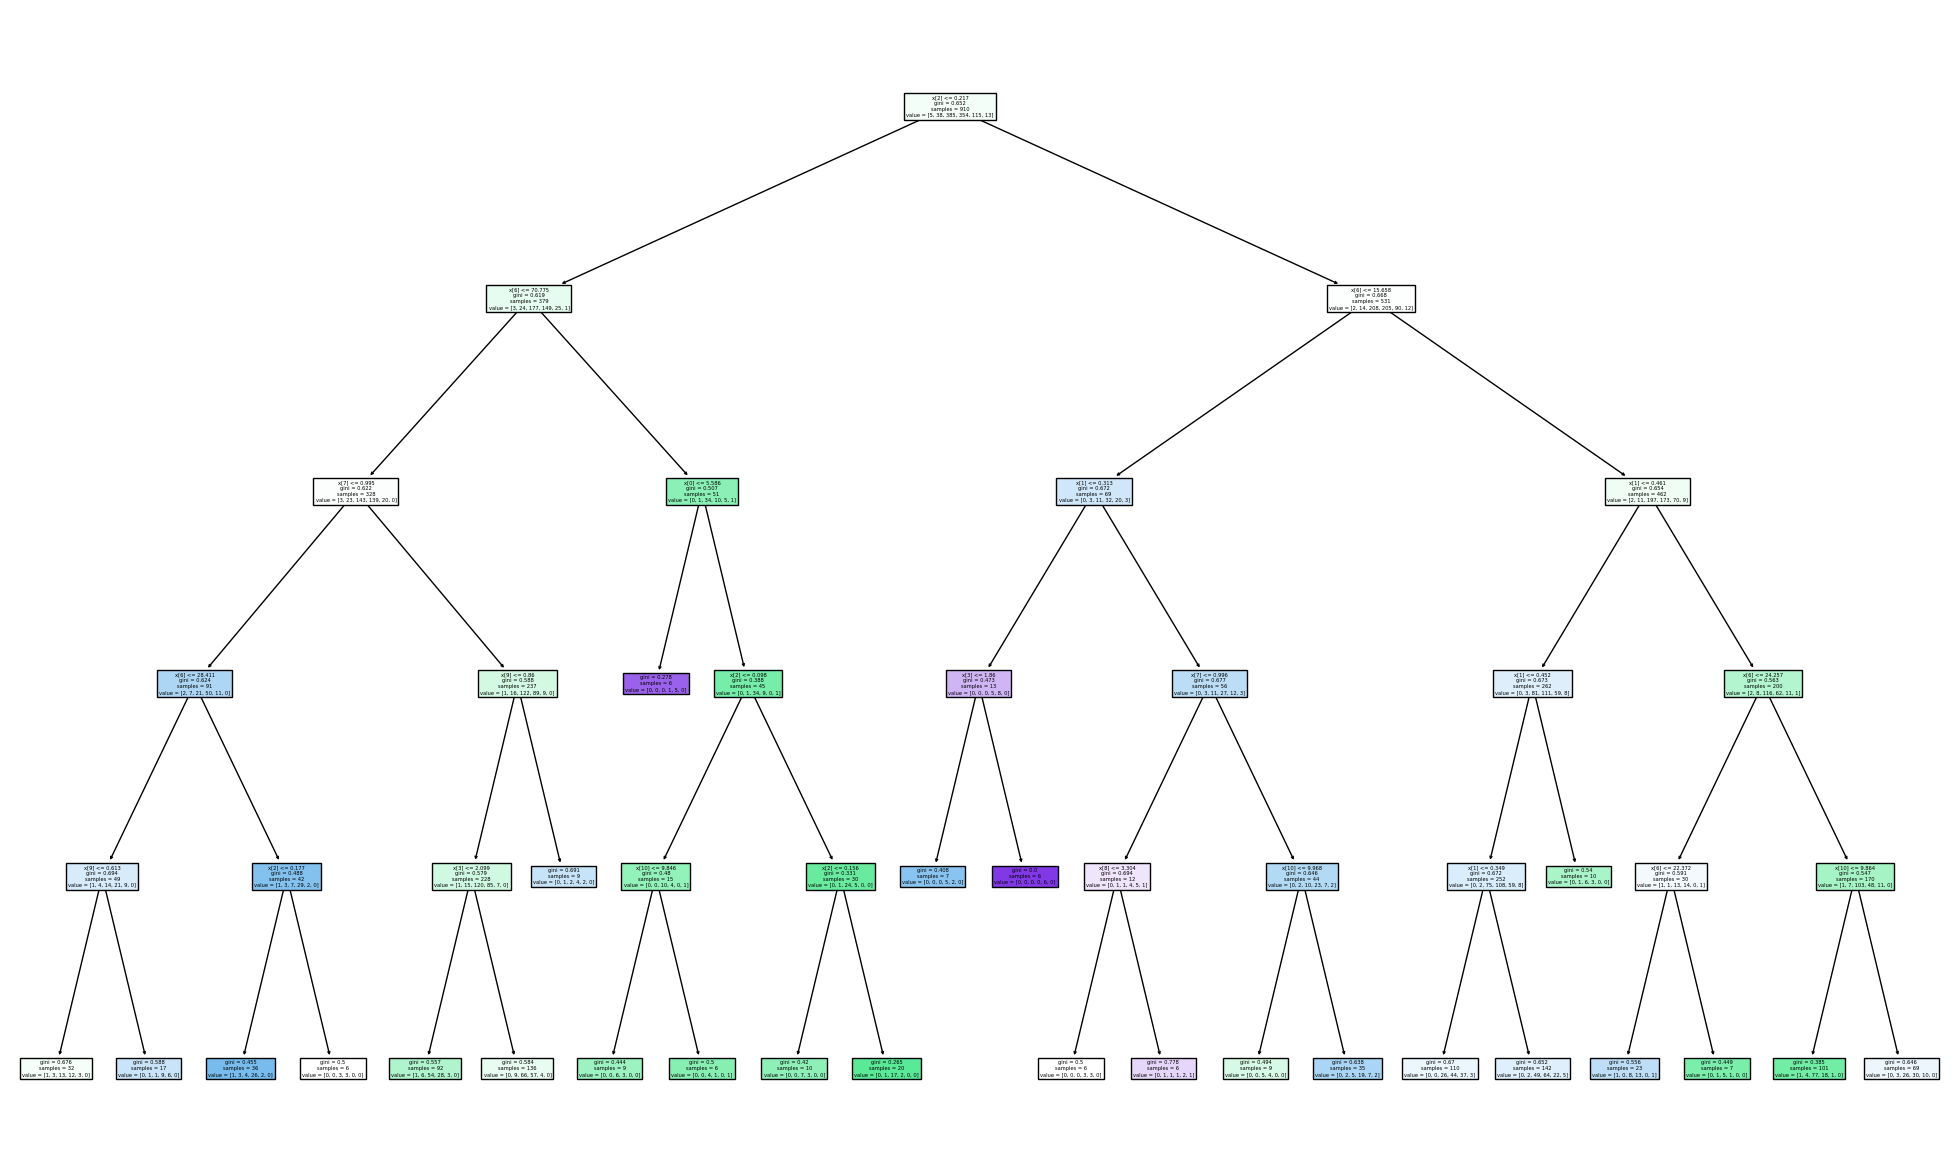

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True)

In [37]:
fig.savefig("Decision_tree.png")

In [38]:
# clearly this decision tree is huge, so we try to add max depths and see it in sections

[Text(0.4851190476190476, 0.9166666666666666, 'x[2] <= 0.217\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.26785714285714285, 0.75, 'x[6] <= 70.775\ngini = 0.619\nsamples = 379\nvalue = [3, 24, 177, 149, 25, 1]'),
 Text(0.17857142857142858, 0.5833333333333334, 'x[7] <= 0.995\ngini = 0.622\nsamples = 328\nvalue = [3, 23, 143, 139, 20, 0]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[6] <= 28.411\ngini = 0.624\nsamples = 91\nvalue = [2, 7, 21, 50, 11, 0]'),
 Text(0.047619047619047616, 0.25, 'x[9] <= 0.613\ngini = 0.694\nsamples = 49\nvalue = [1, 4, 14, 21, 9, 0]'),
 Text(0.023809523809523808, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.07142857142857142, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.25, 'x[2] <= 0.177\ngini = 0.488\nsamples = 42\nvalue = [1, 3, 7, 29, 2, 0]'),
 Text(0.11904761904761904, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.261904761904

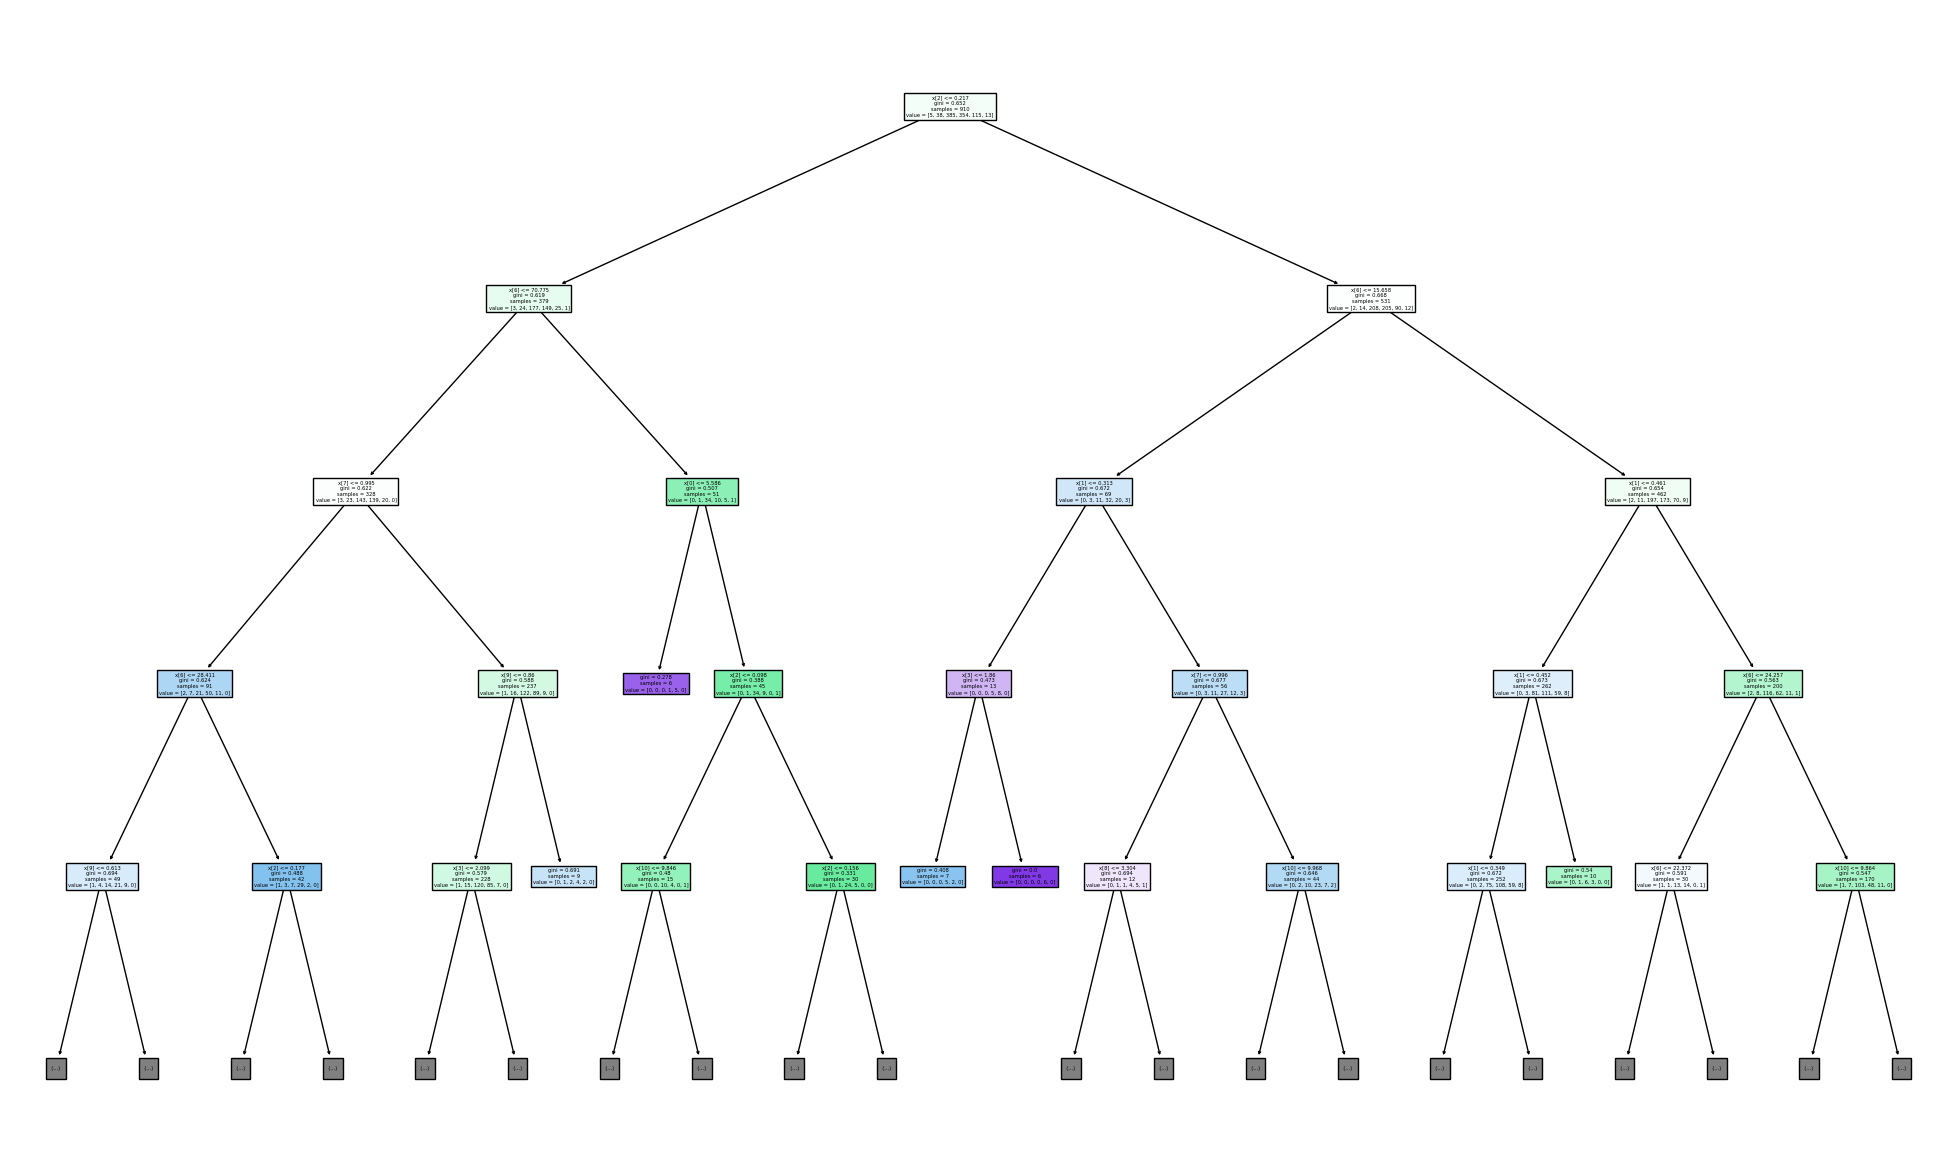

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,max_depth=4,filled=True)

In [40]:
# importing random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [42]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_rf_model_pred = rf_model.predict(X_test)
y_rf_model_pred

array([5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 5, 8, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 5, 6, 7, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 5,
       6, 6, 5, 7, 5, 7, 5, 7, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 7, 7, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 8, 6, 6, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 5,
       6, 6, 6, 7, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5,

In [44]:
accuracy_score(y_test,y_rf_model_pred)

0.6503340757238307

In [45]:
# accuracy has increased

In [46]:
# let's do some hyperparameter tuning for random forest

In [47]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    "criterion" : ["gini","entropy"],
    "max_depth" : range(2,20,1),
    "min_samples_leaf" : range(1,10,1),
    "min_samples_split" : range(2,10,1),
    "max_features" : ["auto","log2"]
}

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,param_grid=grid_param,cv=3,verbose=1,n_jobs=-1) # n_jobs --> how much of cpu is consumed
# verbose is used to check computation time for each iteration

In [49]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


C:\Users\bhattade\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=1)

In [50]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 130}

In [51]:
rf_with_best_params = RandomForestClassifier(criterion= 'gini',
 max_depth= 17,
 max_features= 'auto',
 min_samples_leaf= 8,
 min_samples_split= 3,
 n_estimators= 130)

In [52]:
rf_with_best_params.fit(X_train,y_train)

C:\Users\bhattade\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=17, max_features='auto', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=130)

In [53]:
y_rf_best_params_pred = rf_with_best_params.predict(X_test)
y_rf_best_params_pred

array([5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 6, 6, 7, 6, 7, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5,
       6, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6,

In [54]:
accuracy_score(y_test,y_rf_best_params_pred)

0.623608017817372